<a href="https://colab.research.google.com/github/KaushalJadhav/NT-Theory/blob/main/NT_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><pre>                
                Submitted by- 
                Kaushal Jadhav 
                Roll No. 20EC30019

In [ ]:
# import necessary libraries
# matplotlib is the library used for plotting.
from matplotlib import pyplot as plt
# scipy has a signals module which helps in plotting signals given the transfer function
from scipy import signal
# numpy module used for handling mathematical operations
import numpy as np
# For ease in writing code polynomial seperately imported
from numpy.polynomial import polynomial as P
j=complex(0,1)

Utility functions - 

In [ ]:
def to_w(f):
  return 2*np.pi*f
def to_f(w):
  return w/(2*np.pi)
def to_db(x):
  return 20*np.log10(x)
def from_db(x):
  return np.power(10,x/20)

<H1> $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Butterworth Filter

Formula for magnitude of H(jw) is given by - 
$$
|H(jw)|= 1/(\sqrt[](1+w^{2n}))
$$

In [ ]:
#calculation of n
cutoff_f=10000     # cutoff frequency
transition_f=1000+cutoff_f    #transition frequency
n=(np.log(99)/np.log(transition_f/cutoff_f))/2    # n= (ln(10^2-1)/ln(cutoff frequency/transition frequency))/2
print('Output-\nn=',n)


Output-
n= 24.106133571295995


Thus n is considered as 25.

The transfer function is generated using the poles.

In [ ]:
def generateroots(n):
  k=np.arange(1,n+1)
  return np.exp(j*(2*k+n-1)*np.pi/(2*n))

The following function generates the polynomial given the poles. Thus this function returns the Butterworth polynomial in s domain.

In [ ]:
def butter(n,w=1):
  roots=generateroots(n)
  b=np.array([np.power(w,n)]).astype(np.float)
  a=np.real(P.polyfromroots(roots))
  a=np.multiply(a,np.power(w,np.arange(0,n+1)))
  return b,a 
b,a=butter(25,to_w(10000))
print('output-\n')
print('Numerator=\n',b)     
print('Denominator=\n',a)

output-

Numerator=
 [9.00526939e+119]
Denominator=
 [1.00000000e+000 1.00065828e+006 5.00658493e+011 1.66554764e+017
 4.13349399e+022 8.14051216e+027 1.32142689e+033 1.81308027e+038
 2.13962390e+043 2.19861407e+048 1.98436400e+053 1.58245165e+058
 1.11914687e+063 7.03180719e+067 3.92527469e+072 1.94321423e+077
 8.49978777e+081 3.26554938e+086 1.09243494e+091 3.14326812e+095
 7.64451179e+099 1.53241034e+104 2.43766802e+108 2.89280276e+112
 2.28256295e+116 9.00526939e+119]


In [ ]:
def calculate_butter(n,w,wp):
  return 1/np.sqrt(1+np.power((w/wp),2*n))

def plot_points_butter(n,w,wp=1):
  val=to_db(calculate_butter(n,w,wp))
  return (np.round(to_f(w)),np.round(val,2))


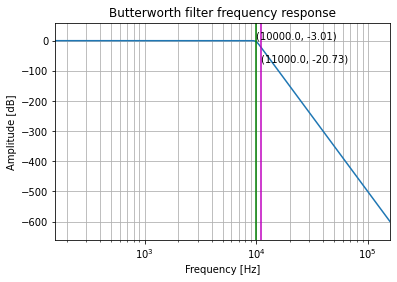

In [ ]:
def plot_butter(b,a,n,wp=1):
  w, h = signal.freqs(b, a) 
  plt.semilogx(w/(2*np.pi),to_db(abs(h))) 
  plt.title('Butterworth filter frequency response') 
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Amplitude [dB]')
  plt.margins(0, 0.1)
  plt.grid(which = 'both', axis = 'both')
  plt.axvline(wp/(2*np.pi), color = 'green') # cutoff frequency 
  plt.axvline(to_w(11000)/(2*np.pi), color = 'm')
  i,j=plot_points_butter(n,wp,wp)
  plt.text(i-100, j+10, '({}, {})'.format(i, j))
  i,j=plot_points_butter(n,to_w(11000),wp)
  plt.text(i+10, j-50, '({}, {})'.format(i, j))
  plt.show()

plot_butter(b,a,25,to_w(10000))

Some observations-<br>
<ol><li> There is no passband ripple in the Butterworth filter.<li> The filter allows a large range of frequencies ( frequencies untill -3 dB). <li> Also the attenuation is very slow. 

The output of the filter is compared with the builtin function and the output matches with the output of the built-in function.

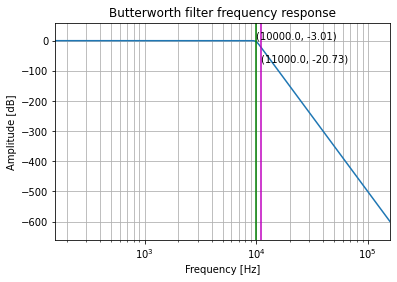

In [ ]:
b,a=signal.butter(25,to_w(10000),btype='low',analog=True)
plot_butter(b,a,25,to_w(10000))

<H1> $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ Chebyshev Filter

In [ ]:
#calculation of epsilon
def epsilon(A):
  return np.sqrt(np.power(10,A/10)-1)
print(epsilon(1))                # Value of epsilon for the given passband ripple of 1dB

0.5088471399095875


In [ ]:
#calculation of n
temp=np.arccosh(np.sqrt(99)/epsilon(1))
n=int(np.ceil(temp/np.arccosh(1.1)))
print(n)

9


In [ ]:
# This function will generate the Cn term in Chebyshev response
def get_Cn(w,n):
  if np.abs(w)<1:
    return np.cos(n*np.arccos(w))
  return np.cosh(n*np.arccosh(w))

The following function generates the Chebyshev response-

In [ ]:
def chebyshev(w,n,epsilon,wp=1):
  return 1/np.sqrt(1+np.power(epsilon*get_Cn(w/wp,n),2))

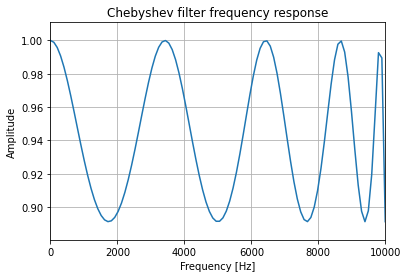

In [ ]:
def plot_chebyshev(n,epsilon,wp=1):
  freq=np.linspace(0,10000,100)
  h=np.array([chebyshev(to_w(f),n,epsilon,wp) for f in freq])
  plt.plot(freq,h) 
  plt.title('Chebyshev filter frequency response') 
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Amplitude')
  plt.margins(0, 0.1)
  plt.grid(which = 'both', axis = 'both')
  plt.show()

plot_chebyshev(9,epsilon(1),to_w(10000))

The plot for Chebyshev filter has been drawn twice. As the filter response is plotted on a semi-log scale the passband response is reploted for clarity. (Figure above).
<br> As can be seen, the passband ripple is 1 dB. The maximum amplitude is 0 dB while the minimum amplitude is -1dB. 

Note- Due to rounding of n (ceil operation), the values of cutoff frequency and the transition band frequency differ. 

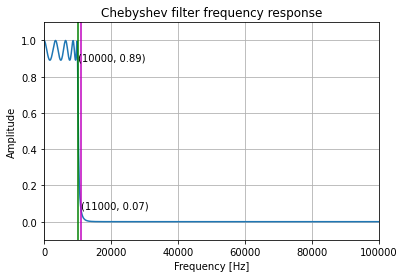

In [ ]:
def plot_chebyshev(n,epsilon,wp=1):
  freq=np.linspace(0,100000,num=1000)
  h=np.array([chebyshev(to_w(f),n,epsilon,wp) for f in freq])
  plt.plot(freq,h) 
  plt.title('Chebyshev filter frequency response') 
  plt.xlabel('Frequency [Hz]')
  plt.ylabel('Amplitude')
  plt.margins(0, 0.1)
  plt.grid(which = 'both', axis = 'both')
  plt.axvline(wp/(2*np.pi), color = 'green') # cutoff frequency 
  plt.axvline(11000, color = 'm')
  i,j=(10000,np.round(chebyshev(to_w(10000),n,epsilon,wp),2))
  plt.text(i,j, '({}, {})'.format(i, j))
  i,j=(11000,np.round(chebyshev(to_w(11000),n,epsilon,wp),2))
  plt.text(i,j, '({}, {})'.format(i, j))
  plt.show()

plot_chebyshev(9,epsilon(1),to_w(10000))

Observations - <br>
<ol> <li> Unlike Butterworth filter, there are ripples in the passband. However the passband amplitude does not fall down to -3dB at the cutoff frequency. That is the Chebyshev response is more ideal in this aspect.
<li>  Also the stopband loss per decade of Chebyshev filter is much higher than Butterworth filter. 

In [ ]:
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/NT_Assignment_3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NT_Assignment_3.ipynb to PDF
[NbConvertApp] Support files will be in NT_Assignment_3_files/
[NbConvertApp] Making directory ./NT_Assignment_3_files
[NbConvertApp] Making directory ./NT_Assignment_3_files
[NbConvertApp] Making directory ./NT_Assignment_3_files
[NbConvertApp] Making directory ./NT_Assignment_3_files
[NbConvertApp] Writing 65648 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 110442 bytes to /content/drive/MyDrive/Colab Notebooks/NT_Assignment_3.pdf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa